# Exercise 2.1:
Compute the distance from your home to the five largest capitals in
the EU, using both the Earth distance and the Euclidean distance <br>
*   https://www.itilog.com/ provides Lat, Long of an address
*   Create a bar chart with the absolute difference between the
Earth and Euclidean distances for each capital
*   Are the Earth and Euclidean distances coherent? Make a plot to show that
*   Submit a (well-commented) python notebook

In [1]:
#installing random library with EU country names (lazy)
!pip install countrygroups

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing the data

In [2]:
from countrygroups import EUROPEAN_UNION
import urllib.request
import json

file_name = 'capitals.json'

#downloading a json with the latitude and longitudes of world capitals
urllib.request.urlretrieve('http://techslides.com/demos/country-capitals.json', file_name)

#importing the json file
with open(file_name, 'r') as f:
    data = json.loads(f.read())

In [3]:
EU_countries = EUROPEAN_UNION.names 
#a quick check made it clear Czechia had to be fixed to match the other json
EU_countries.remove('Czechia')
EU_countries.append('Czech Republic')

In [4]:
#extracting the EU capitals from the json
EU_capitals = [capital for capital in data if capital['CountryName'] in EU_countries]
EU_capitals

[{'CountryName': 'Austria',
  'CapitalName': 'Vienna',
  'CapitalLatitude': '48.2',
  'CapitalLongitude': '16.366667',
  'CountryCode': 'AT',
  'ContinentName': 'Europe'},
 {'CountryName': 'Belgium',
  'CapitalName': 'Brussels',
  'CapitalLatitude': '50.833333333333336',
  'CapitalLongitude': '4.333333',
  'CountryCode': 'BE',
  'ContinentName': 'Europe'},
 {'CountryName': 'Bulgaria',
  'CapitalName': 'Sofia',
  'CapitalLatitude': '42.68333333333333',
  'CapitalLongitude': '23.316667',
  'CountryCode': 'BG',
  'ContinentName': 'Europe'},
 {'CountryName': 'Croatia',
  'CapitalName': 'Zagreb',
  'CapitalLatitude': '45.8',
  'CapitalLongitude': '16.000000',
  'CountryCode': 'HR',
  'ContinentName': 'Europe'},
 {'CountryName': 'Cyprus',
  'CapitalName': 'Nicosia',
  'CapitalLatitude': '35.166666666666664',
  'CapitalLongitude': '33.366667',
  'CountryCode': 'CY',
  'ContinentName': 'Europe'},
 {'CountryName': 'Czech Republic',
  'CapitalName': 'Prague',
  'CapitalLatitude': '50.08333333333

In [5]:
#just a quick check if they are those 27
assert len([x['CountryName'] for x in EU_capitals]) == 27, 'There are not 27 countries!'
set(EU_countries) == set([x['CountryName'] for x in EU_capitals])

True

In [6]:
#making the capital lat and lon from strings to floats
for capital in EU_capitals:
    capital['CapitalLatitude'] = float(capital['CapitalLatitude'])
    capital['CapitalLongitude'] = float(capital['CapitalLongitude'])

#making the data easier to call (a dictionary to call from the capital)
EU_capdict = {x['CapitalName'] : x for x in EU_capitals}
EU_capdict

{'Vienna': {'CountryName': 'Austria',
  'CapitalName': 'Vienna',
  'CapitalLatitude': 48.2,
  'CapitalLongitude': 16.366667,
  'CountryCode': 'AT',
  'ContinentName': 'Europe'},
 'Brussels': {'CountryName': 'Belgium',
  'CapitalName': 'Brussels',
  'CapitalLatitude': 50.833333333333336,
  'CapitalLongitude': 4.333333,
  'CountryCode': 'BE',
  'ContinentName': 'Europe'},
 'Sofia': {'CountryName': 'Bulgaria',
  'CapitalName': 'Sofia',
  'CapitalLatitude': 42.68333333333333,
  'CapitalLongitude': 23.316667,
  'CountryCode': 'BG',
  'ContinentName': 'Europe'},
 'Zagreb': {'CountryName': 'Croatia',
  'CapitalName': 'Zagreb',
  'CapitalLatitude': 45.8,
  'CapitalLongitude': 16.0,
  'CountryCode': 'HR',
  'ContinentName': 'Europe'},
 'Nicosia': {'CountryName': 'Cyprus',
  'CapitalName': 'Nicosia',
  'CapitalLatitude': 35.166666666666664,
  'CapitalLongitude': 33.366667,
  'CountryCode': 'CY',
  'ContinentName': 'Europe'},
 'Prague': {'CountryName': 'Czech Republic',
  'CapitalName': 'Prague',

<font size="4">Home Coordinates</font>

In [7]:
#The coordinates of the Pisa tower (not sharing my home coordinates on GitHub)
home_lat = 43.7228555 #North
home_lon = 10.3963002 #East

## Doing the math

In [8]:
from math import cos, sin, asin, sqrt, pi

def to_radians(*args): #I needed radians to work with trigonometry
    for raw in args:
        yield raw*(pi/180) #I made it a generator out of convenience

assert round(next(to_radians(1)), 5) == 0.01745, "It's not equal to the proper conversion of degree to radians"

<font size="4">Earth Distances</font>

In [9]:
def haversine_formula(latP, lonP, latQ, lonQ):
    #converting the latitude and longitudes to radians
    latP, lonP, latQ, lonQ = tuple(to_radians(latP, lonP, latQ, lonQ))
    #print(latP, lonP, latQ, lonQ)

    earth_radius = 6371 #km, from wikipedia

    Dlat = latQ - latP
    Dlon = lonQ - lonP

    #I copied and translated the formula to python
    to_sqrt = sin(Dlat/2)**2 + cos(latP)*cos(latQ)*sin(Dlon/2)**2
    d = 2*earth_radius*asin(sqrt(to_sqrt))

    return  d

In [11]:
#testing the formula
assert round(
             haversine_formula(home_lat, 
                               home_lon, 
                               EU_capdict['Valletta']['CapitalLatitude'],
                               EU_capdict['Valletta']['CapitalLongitude']), 
             
             0) == 939, 'Online calculator told me it was 939 km from la Valletta'

<font size="4">Euclidean Distances</font>

In [12]:
def euclidean_distance(latP, lonP, latQ, lonQ):
    #converting the latitude and longitudes to radians
    latP, lonP, latQ, lonQ = tuple(to_radians(latP, lonP, latQ, lonQ))

    earth_radius = 6371 #km, from wikipedia
    
    #from radians to kilometers by multiplying earth radius
    return earth_radius*sqrt((latP-latQ)**2+(lonP-lonQ)**2)

In [13]:
#testing the result
euclidean_distance(home_lat, 
                   home_lon, 
                   EU_capdict['Valletta']['CapitalLatitude'], 
                   EU_capdict['Valletta']['CapitalLongitude'])

983.9240642026665

## Computing the distances

In [14]:
import matplotlib.pyplot as plt

Computing the distances <br>
<font size="4">I did as requested for the 5 largest EU cities but it is possible to look at them all by removing "five_largest: #"</font>

In [23]:
#I intended as the five largest the 5 cities in the EU with most inhabitants within the city limits
five_largest = ['Berlin', 'Madrid', 'Rome', 'Bucharest', 'Paris']

latP, lonP = home_lat, home_lon
earth_distdict = dict()
euclidean_distdict = dict()

for capital in five_largest: #EU_capdict.keys(): #to get them all
    #setting the new capital latitude and longitudes
    latQ = EU_capdict[capital]['CapitalLatitude']
    lonQ = EU_capdict[capital]['CapitalLongitude']

    #computing earth distance between home and capital
    earth = haversine_formula(latP, lonP, latQ, lonQ)
    earth_distdict[capital] = earth #adding result

    #computing euclidean distance between home and capital
    euclid = euclidean_distance(latP, lonP, latQ, lonQ)
    euclidean_distdict[capital] = euclid #adding result

Text(0.5, 1.0, 'Earth Distance: My Home - EU capitals')

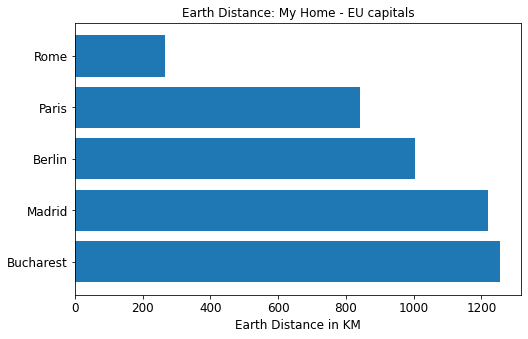

In [24]:
#sorting by distance
earth_list = sorted(earth_distdict.items(), key = lambda x : -x[1])

#plotting the earth distance between my home and EU capitals
if len(earth_list) > 5: #in case all capitals are plotted (need more space)
    plt.figure(figsize=(15,10))
    font = 20
else: #default
    plt.figure(figsize=(8, 5))
    font = 12
names = [x[0] for x in earth_list]
values = [x[1] for x in earth_list]
plt.barh(names, values)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.xlabel('Earth Distance in KM', fontsize=font)
plt.title('Earth Distance: My Home - EU capitals',fontsize=font)

Text(0.5, 1.0, 'Euclidean Distance: My Home - EU capitals')

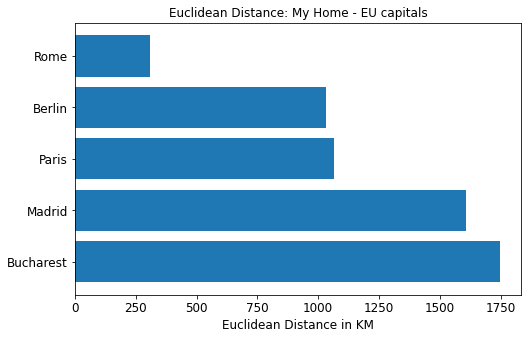

In [25]:
#sorting by distance
euclidean_list = sorted(euclidean_distdict.items(), key = lambda x : -x[1])

#plotting the euclidean distance between my home and EU capitals
if len(euclidean_list) > 5: #in case all capitals are plotted (need more space)
    plt.figure(figsize=(15,10))
    font = 20
else: #default
    plt.figure(figsize=(8, 5))
    font = 12
names = [x[0] for x in euclidean_list]
values = [x[1] for x in euclidean_list]
plt.barh(names, values)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.xlabel('Euclidean Distance in KM', fontsize=font)
plt.title('Euclidean Distance: My Home - EU capitals',fontsize=font)

## Absolute difference (Earth-Euclidean)

In [26]:
import numpy as np

In [27]:
#Here I sorted again the distances and capitals by name to compute the absolute differences
earth_byname = sorted(earth_distdict.items(), key = lambda x : x[0])
euclidean_byname = sorted(euclidean_distdict.items(), key = lambda x : x[0])

In [28]:
names = [x[0] for x in earth_byname] #getting the name from one of the two identical sets

#computing the absolute distances
abs_dist = np.abs(np.array([x[1] for x in earth_byname]) - np.array([x[1] for x in euclidean_byname]))
#sorting the distances by descending order (in barplot the largest will be at the bottom)
abs_dist_list = sorted(list(zip(names, abs_dist)), key = lambda x : -x[1])

Text(0.5, 1.0, 'Absolute differences of Earth-Euclidean Distances')

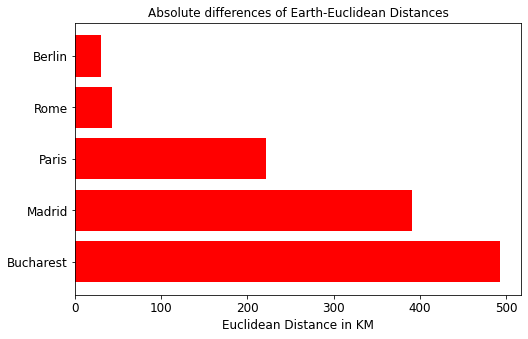

In [29]:
#plotting the euclidean distance between my home and EU capitals
if len(abs_dist_list) > 5: #in case I plotted all the capitals
    plt.figure(figsize=(15,10))
    font = 20
else: #default
    plt.figure(figsize=(8, 5))
    font = 12
names = [x[0] for x in abs_dist_list]
values = [x[1] for x in abs_dist_list]
plt.barh(names, values, color='red')
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.xlabel('Euclidean Distance in KM', fontsize=font)
plt.title('Absolute differences of Earth-Euclidean Distances',fontsize=font)

By looking at all european capital-home distances, it seems the largest difference in absolute Earth-Euclidean distances are those for which the arc from which the distance is computed is closer to approximate a parallel

Text(0.5, 1.0, 'Checking if the distances are generally coherent')

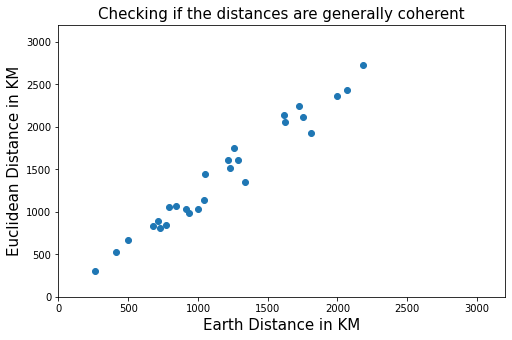

In [22]:
#I left the previous computation of all european cities to have a more general view
plt.figure(figsize=(8,5))
plt.scatter([x[1] for x in earth_byname], [x[1] for x in euclidean_byname])
plt.xlabel('Earth Distance in KM', fontsize=15)
plt.ylabel('Euclidean Distance in KM', fontsize=15)
plt.xlim(0, 3200)
plt.ylim(0, 3200)
plt.title('Checking if the distances are generally coherent', fontsize=15)

Euclidean distances grows faster but it seems they are still coherent with Earth distances at the continental scale from my home, considering the positive correlation shown in the graph